In [ ]:
from ROOT import TFile, TFractionFitter, TObjArray

import pprint
from coffea import hist, util
from coffea.analysis_objects import JaggedCandidateArray

import coffea.processor as processor

class TTGammaCutflow(processor.ProcessorABC):
    def __init__(self):
        ### This function is where the histograms are defined and any other initialization happens
        
        #Declare an axis for the dataset
        dataset_axis = hist.Cat("dataset","Dataset")
        
        #Declare an axis 
        misID_pt_axis = hist.Bin("pt","$p_{T}$ [GeV]", 40, 0, 200)
        
 #Define the accumulator object, a dictionary storing all of the histograms and counters 
        #that we will fill later in the process function
        self._accumulator = processor.dict_accumulator({
            'misIDele': hist.Hist("Counts", dataset_axis, misID_pt_axis),
        }
        )
    
   
    @property
    def accumulator(self):
        return self._accumulator

    def process(self, df):
        ### The process function is where most of the work happens. As we'll see below, this is
        ### where the main analysis work happens (object cuts, event selections, filling histograms). 
        
        ## This gets us the accumulator dictionary we defined in init
        output = self.accumulator.identity()

        ## To access variables from the ntuples, use the dataframe "df" object:
        dataset = df['dataset']
        
        ## A JaggedCandidateArray consists of several columns packaged together into a physics object
        ## Each of the muon variables below will be accessible later using muons.key_name
        misIDEle = JaggedCandidateArray.candidatesfromcounts(
            df['misIDEle'],
            misID=df['MisIDele_nominal'],
            WG=df['WGamma_nominal'],
            ZG=df['ZGamma_nominal'],
            other=df['Other_nominal'],

        )
        

        # Fill the muon_pt histogram using the tightMuons in events that pass our selection 
        # Note that flatten() is required when filling a histogram to remove the jaggedness
        output['misIDEle'].fill(dataset=dataset,
                              pt=tightMuons[eventSelection].pt.flatten())
        
     
        return output

    def postprocess(self, accumulator):
        return accumulator


34
34
34
34


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


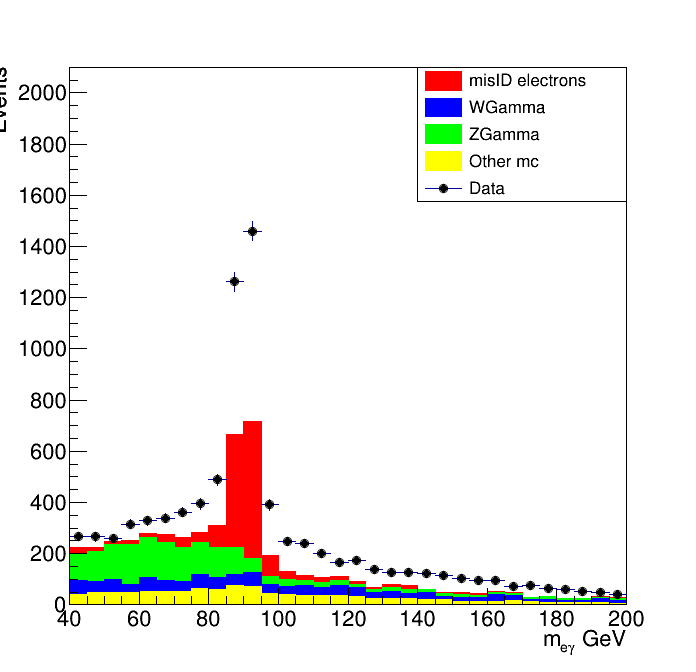

In [15]:
import ROOT as r


file = r.TFile.Open("MisID_Output_electron.root","r")

hist = r.THStack()
hists = []
misIDh = file.Get("MisIDele_nominal")
misIDh.SetLineColor(r.kRed)
misIDh.SetFillColor(r.kRed)
print (misIDh.GetSize())
# misIDh.Sumw2()
# misIDh.Draw("hist")


Wgh = file.Get("WGamma_nominal")
Wgh.SetLineColor(r.kBlue)
Wgh.SetFillColor(r.kBlue)
print (Wgh.GetSize())
# Wgh.Sumw2()
# Wgh.Draw("hist same")
# hist.Add(Wgh)

Zgh = file.Get("ZGamma_nominal")
Zgh.SetLineColor(r.kGreen)
Zgh.SetFillColor(r.kGreen)
print (Zgh.GetSize())
# Zgh.Sumw2()
# Zgh.Draw("hist same")


Otherh = file.Get("Other_nominal")
Otherh.SetLineColor(r.kYellow)
Otherh.SetFillColor(r.kYellow)
print (Otherh.GetSize())
# Otherh.Sumw2()

hists.append(misIDh)
hists.append(Wgh)
hists.append(Zgh)
hists.append(Otherh)

# h_sum =  r.TH1F()
# for h in hists:
#     h_sum.Add(h)
    
h_sum.SetFillStyle(3005)
h_sum.SetFillColor(r.kBlack)
h_sum.Draw("E2 same")
# Otherh.Draw("hist same")

Data = file.Get("dataObs")
Data.SetMarkerStyle(8)

# c1.Draw()
# c1.Update()
leg = r.TLegend(0.6,0.7,0.9,0.9)
leg.AddEntry(misIDh,"misID electrons","f")
leg.AddEntry(Wgh,"WGamma","f")
leg.AddEntry(Zgh,"ZGamma","f")
leg.AddEntry(Otherh,"Other mc","f")
leg.AddEntry(Data, "Data","lp")

c2 = r.TCanvas("c2","c2",700,700)

hist.Add(Otherh)

hist.Add(Wgh)
hist.Add(Zgh)
hist.Add(misIDh)
hist.Draw("hist")
leg.Draw("same")

hist.SetMaximum(2000)

hist.GetHistogram()
Data.Draw("same")
hist.GetXaxis().SetTitle("m_{e#gamma} GeV")
hist.GetYaxis().SetTitle("Events")

c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


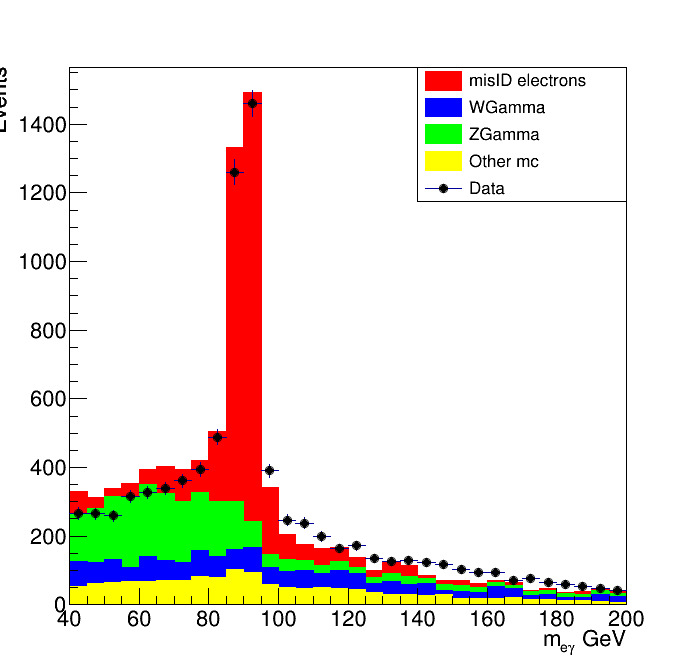

In [16]:
c1 = r.TCanvas("c1","c1",700,700)

hist_postFit = r.THStack()

misIDh.Scale(2.331880192302395)
Otherh.Scale(1.3421932274815827)
Wgh.Scale(1.3421932274815827)
Zgh.Scale(1.3421932274815827)

hist_postFit.Add(Otherh)
hist_postFit.Add(Wgh)
hist_postFit.Add(Zgh)
hist_postFit.Add(misIDh)
hist_postFit.Draw("hist")

leg.Draw("same")

Data.Draw("same")
hist_postFit.GetHistogram()
hist_postFit.GetXaxis().SetTitle("m_{e#gamma} GeV")
hist_postFit.GetYaxis().SetTitle("Events")


c1.Draw()



In [17]:
print("hi")

hi
